<a href="https://colab.research.google.com/github/BharathiVetukuri/CMPE-256_Asgn2_Feature-Engineering-Unstructured-Data/blob/main/FeatureEngUnstructuredData__Johns_Hopkins_APL_Parker_Solar_Probe_Whistler_Mode_Waves_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install librosa
!pip3 install numba>=0.53

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import librosa
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

audio_data = "/content/4 Parker Solar Probe - Whistler Mode Waves 2.mp3"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(308700,) 22050


In [4]:
librosa.load(audio_data, sr=44100)

(array([-0.0015847 , -0.00704776, -0.01335788, ...,  0.00042864,
         0.00049548,  0.0003892 ], dtype=float32),
 44100)

In [5]:
import IPython.display as ipd
ipd.Audio(audio_data)

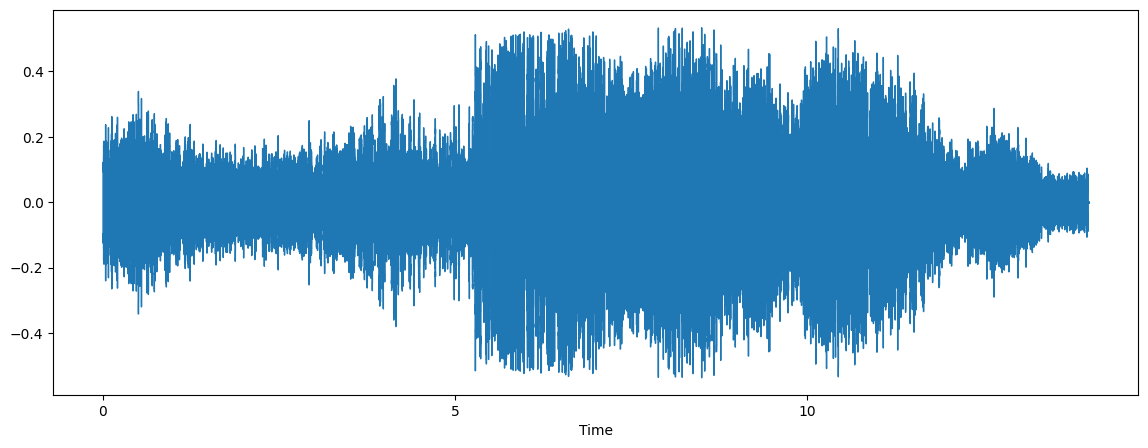

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

# **Short-time Fourier transform (STFT)**

In [7]:
#https://librosa.org/doc-playground/main/generated/librosa.feature.chroma_stft.html?highlight=ibrosa%20feature%20chroma_stft#librosa.feature.chroma_stft
#Energy
librosa.feature.chroma_stft(y=x, sr=sr)

array([[0.32244918, 0.37615985, 0.40432602, ..., 0.09147006, 0.09739956,
        0.06802354],
       [1.        , 1.        , 1.        , ..., 0.09466668, 0.08779547,
        0.06431663],
       [0.5324339 , 0.55343306, 0.7175704 , ..., 0.08532543, 0.10556448,
        0.09700583],
       ...,
       [0.04557947, 0.0486314 , 0.08774488, ..., 0.23884958, 0.34467185,
        0.3311523 ],
       [0.08080078, 0.14507908, 0.17270449, ..., 0.14231361, 0.18650606,
        0.17921156],
       [0.07319956, 0.18939823, 0.2559348 , ..., 0.15292153, 0.25682652,
        0.20745595]], dtype=float32)

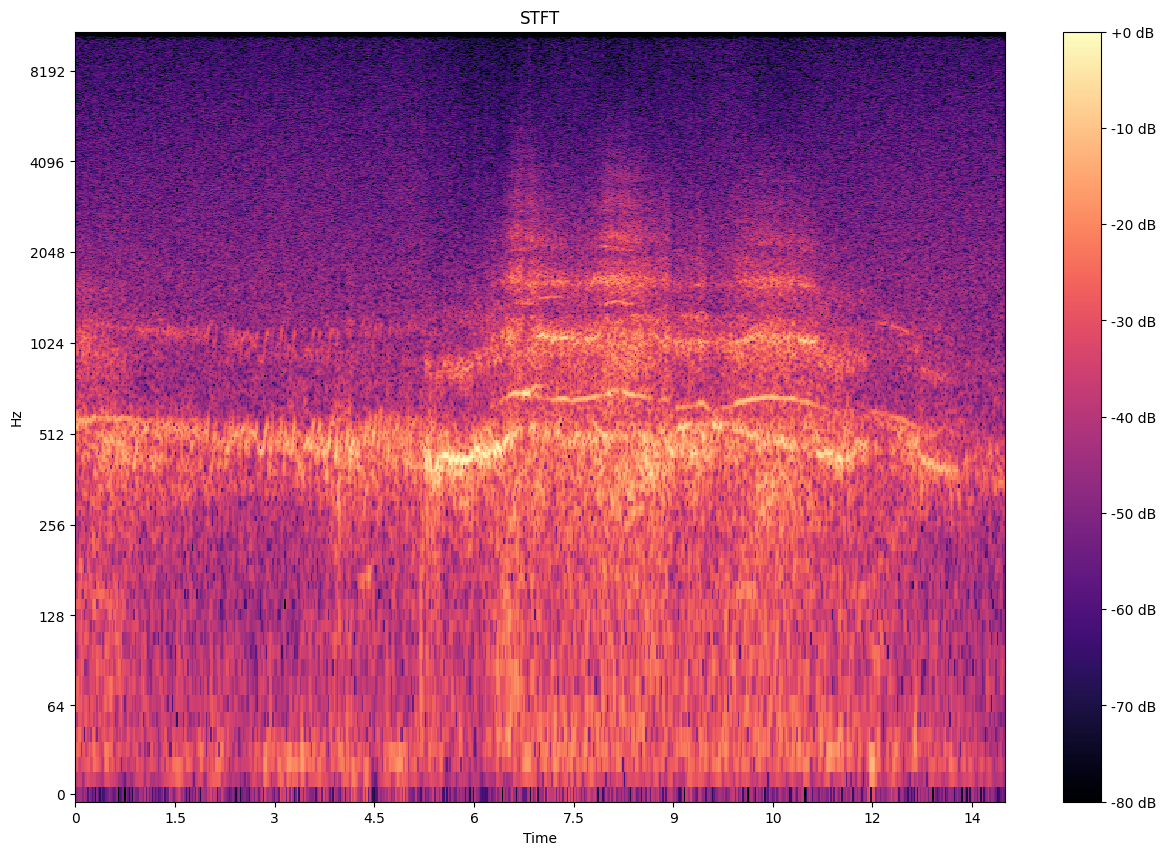

In [8]:
stft_result = librosa.stft(y=x)

stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.show()

# **MFCCs**

(20, 603)


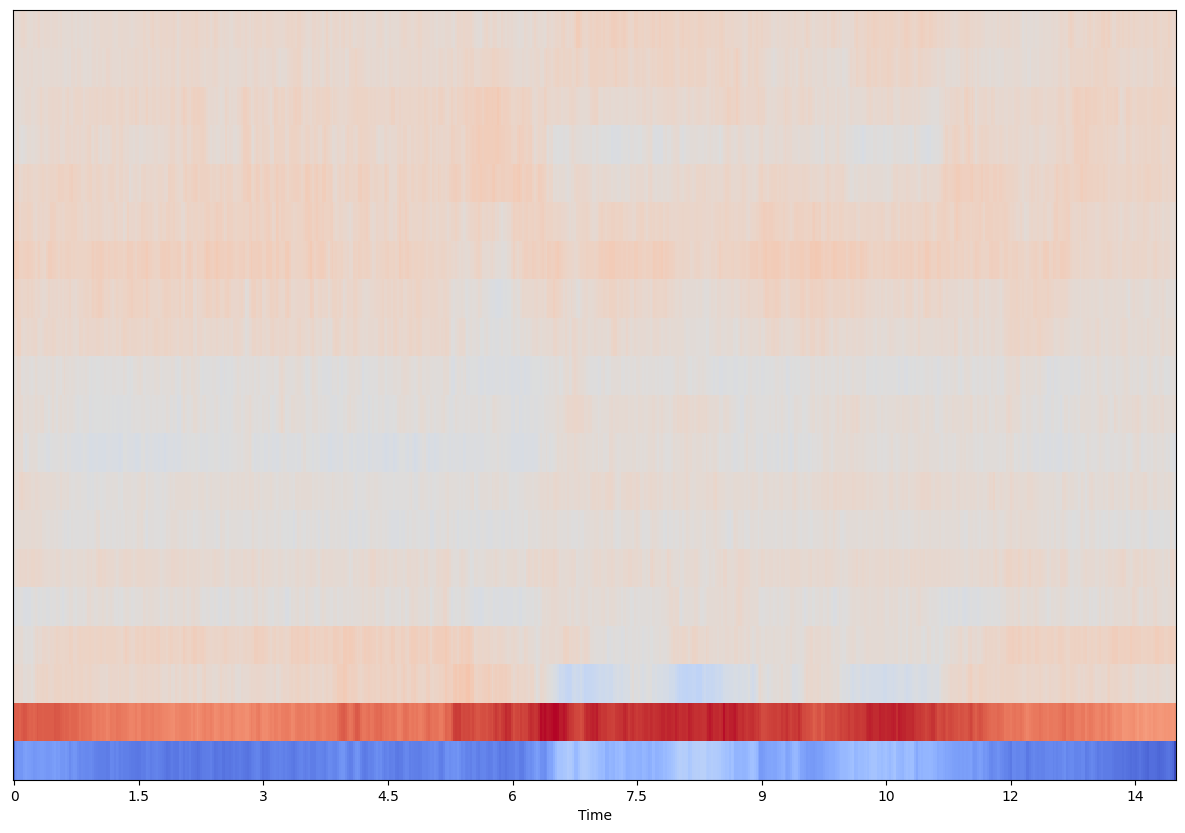

In [9]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [10]:
mfccs

array([[-1.8895425e+02, -1.4834189e+02, -1.4261252e+02, ...,
        -1.8060658e+02, -1.8759727e+02, -2.1480110e+02],
       [ 1.3824045e+02,  1.3771359e+02,  1.3777570e+02, ...,
         8.9315048e+01,  8.8086151e+01,  9.3047012e+01],
       [ 1.2797935e+00,  6.3622022e-01,  2.5489021e-02, ...,
         7.3255420e-01,  6.1674452e-01,  2.8724747e+00],
       ...,
       [-8.5397663e+00, -6.2319274e+00, -4.4753923e+00, ...,
         1.0689602e+01,  1.1338039e+01,  1.2199444e+01],
       [-9.5859623e+00, -3.3788276e+00, -1.4433399e+00, ...,
         7.4249039e+00,  2.8161077e+00,  9.0697891e-01],
       [-4.0551558e+00, -1.9793204e+00, -2.1006942e+00, ...,
         7.5042295e+00,  2.8030214e+00,  5.0810971e+00]], dtype=float32)

In [11]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

(20, 603)


In [12]:
mfccs

array([[-1.8895425e+02, -1.4834189e+02, -1.4261252e+02, ...,
        -1.8060658e+02, -1.8759727e+02, -2.1480110e+02],
       [ 1.3824045e+02,  1.3771359e+02,  1.3777570e+02, ...,
         8.9315048e+01,  8.8086151e+01,  9.3047012e+01],
       [ 1.2797935e+00,  6.3622022e-01,  2.5489021e-02, ...,
         7.3255420e-01,  6.1674452e-01,  2.8724747e+00],
       ...,
       [-8.5397663e+00, -6.2319274e+00, -4.4753923e+00, ...,
         1.0689602e+01,  1.1338039e+01,  1.2199444e+01],
       [-9.5859623e+00, -3.3788276e+00, -1.4433399e+00, ...,
         7.4249039e+00,  2.8161077e+00,  9.0697891e-01],
       [-4.0551558e+00, -1.9793204e+00, -2.1006942e+00, ...,
         7.5042295e+00,  2.8030214e+00,  5.0810971e+00]], dtype=float32)

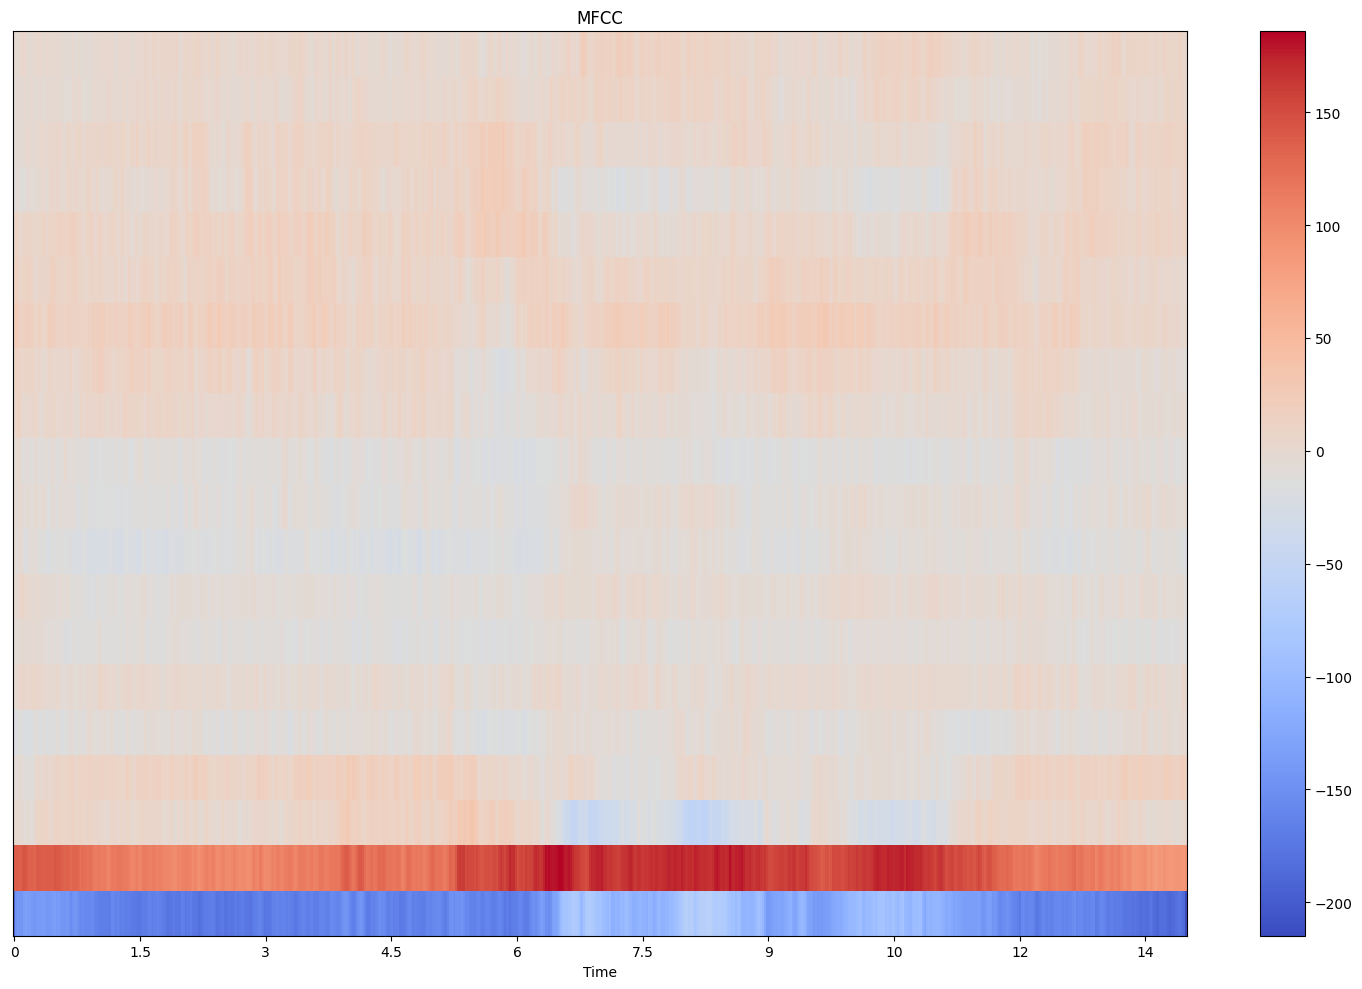

In [13]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

# **Spectrogram**

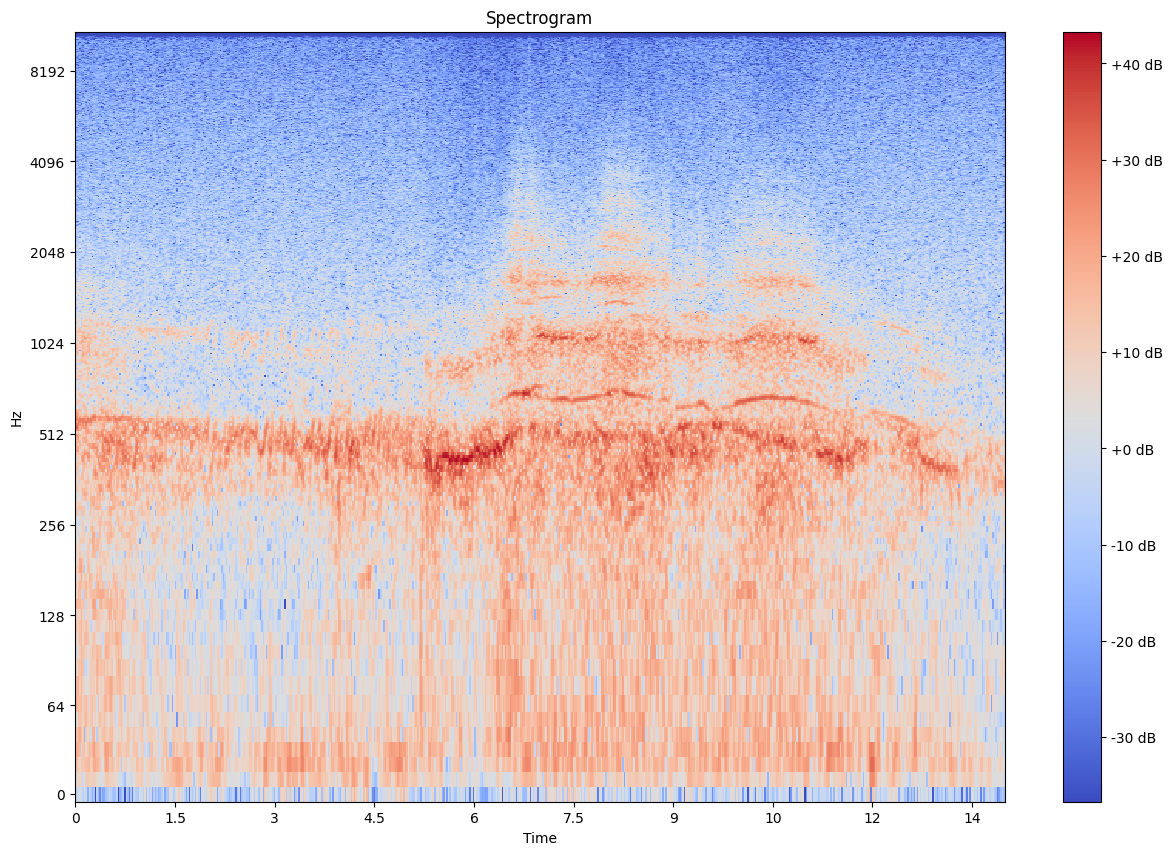

In [14]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 10))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [15]:
X

array([[-3.14106494e-02+0.00000000e+00j,  7.10177183e-01+0.00000000e+00j,
        -8.98013949e-01+0.00000000e+00j, ...,
        -2.33582199e-01+0.00000000e+00j,  4.20253932e-01+0.00000000e+00j,
        -2.43717015e-01+0.00000000e+00j],
       [ 1.18971848e+00-6.62700459e-02j, -1.89432204e+00+7.30793297e-01j,
         1.27995324e+00-2.44230700e+00j, ...,
         1.12391281e+00+1.35685492e+00j, -1.36244369e+00-6.84960961e-01j,
         8.95623624e-01-3.33415456e-02j],
       [-2.96130300e-01+2.41824317e+00j,  4.17546368e+00-3.73773336e+00j,
        -3.38606834e+00+4.09136206e-01j, ...,
        -1.89292741e+00-2.57773519e+00j,  1.43741632e+00+1.67227197e+00j,
        -1.17564297e+00-6.92782104e-01j],
       ...,
       [ 2.17244160e-05+3.33991666e-05j, -1.98143189e-05-1.65891470e-05j,
        -1.30873616e-06+5.42596240e-07j, ...,
        -5.64250797e-07+1.56724013e-07j,  9.74043473e-07-3.53600285e-07j,
         1.15291768e-04-2.46673771e-05j],
       [-2.18404275e-05-1.67098206e-05j, -8.

In [16]:
Xdb

array([[-30.058462  ,  -2.972666  ,  -0.9343385 , ..., -12.631206  ,
         -7.529764  , -12.262282  ],
       [  1.5223385 ,   6.1516232 ,   8.809933  , ...,   4.919546  ,
          3.665022  ,  -0.95147556],
       [  7.734641  ,  14.970008  ,  10.656862  , ...,  10.097861  ,
          6.868739  ,   2.6999917 ],
       ...,
       [-36.70259   , -36.70259   , -36.70259   , ..., -36.70259   ,
        -36.70259   , -36.70259   ],
       [-36.70259   , -36.70259   , -36.70259   , ..., -36.70259   ,
        -36.70259   , -36.70259   ],
       [-36.70259   , -36.70259   , -36.70259   , ..., -36.70259   ,
        -36.70259   , -36.70259   ]], dtype=float32)

# **Chromagram**

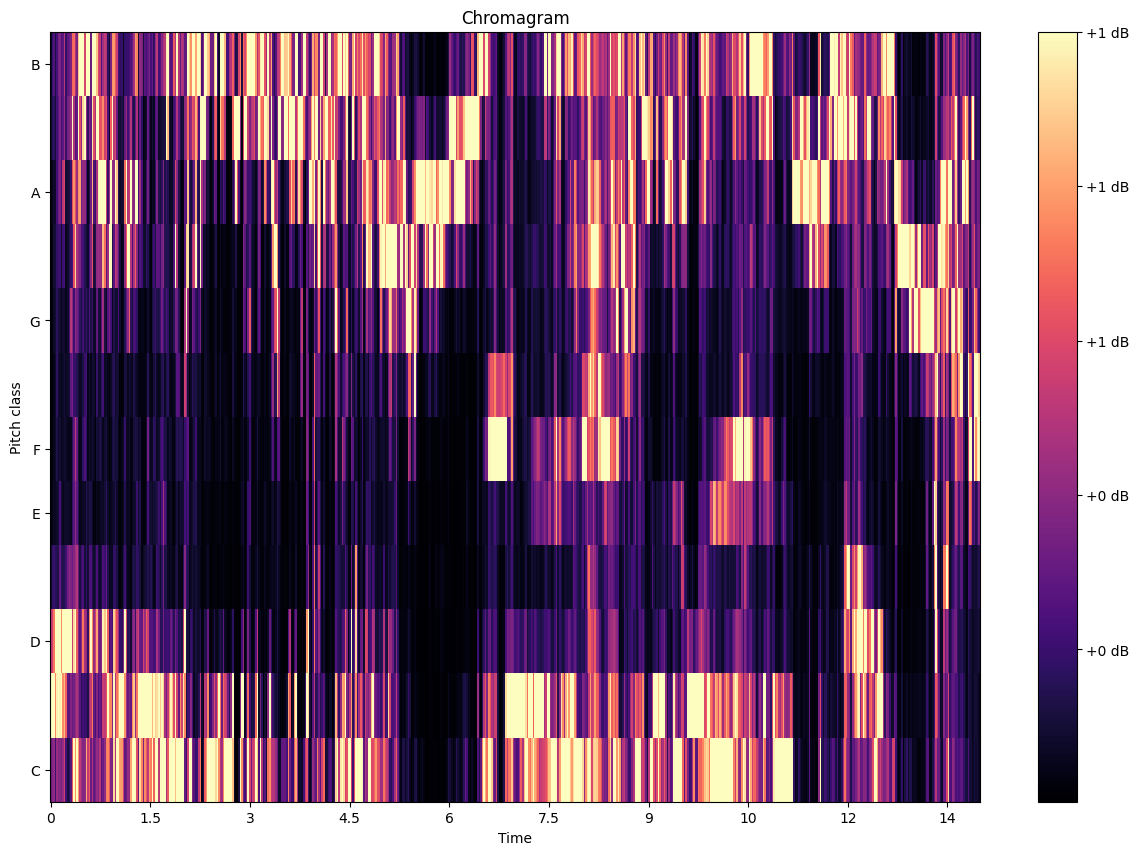

In [17]:
chroma_db = librosa.feature.chroma_stft(y=x, sr=sr)

plt.figure(figsize=(15, 10))
librosa.display.specshow(chroma_db, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Chromagram')
plt.show()

In [18]:
chroma_db

array([[0.32244918, 0.37615985, 0.40432602, ..., 0.09147006, 0.09739956,
        0.06802354],
       [1.        , 1.        , 1.        , ..., 0.09466668, 0.08779547,
        0.06431663],
       [0.5324339 , 0.55343306, 0.7175704 , ..., 0.08532543, 0.10556448,
        0.09700583],
       ...,
       [0.04557947, 0.0486314 , 0.08774488, ..., 0.23884958, 0.34467185,
        0.3311523 ],
       [0.08080078, 0.14507908, 0.17270449, ..., 0.14231361, 0.18650606,
        0.17921156],
       [0.07319956, 0.18939823, 0.2559348 , ..., 0.15292153, 0.25682652,
        0.20745595]], dtype=float32)

# **Mel-Scaled Spectrogram**

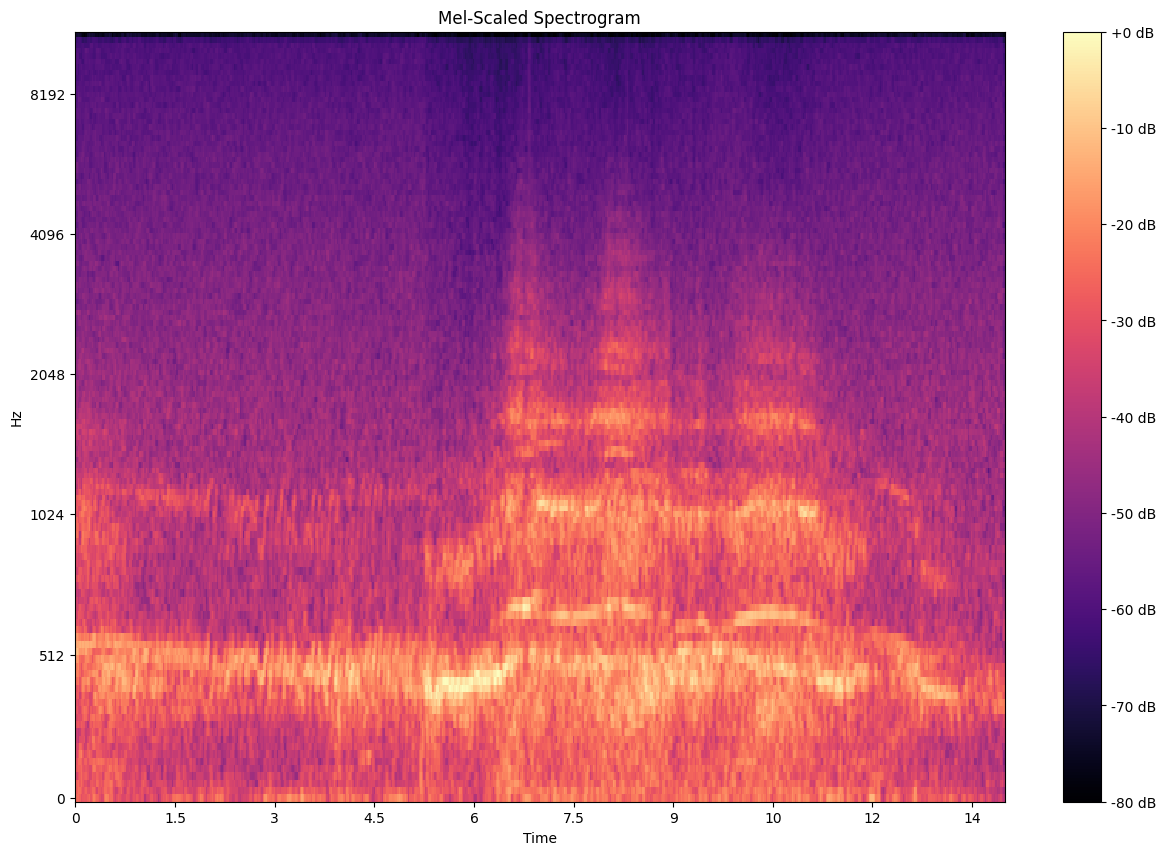

In [19]:
mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr)

mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Scaled Spectrogram')
plt.show()

In [20]:
mel_spectrogram

array([[5.9533834e-01, 3.2363591e+00, 3.8285904e+00, ..., 6.3203877e-01,
        2.3288698e-01, 1.1636705e-01],
       [6.6143513e-01, 2.2983584e+00, 4.5434275e+00, ..., 2.0294054e-01,
        1.1854868e-01, 5.6000214e-02],
       [4.6608502e-01, 2.5166168e+00, 3.9115417e+00, ..., 4.9200925e-01,
        7.6739609e-01, 2.3057455e-01],
       ...,
       [4.8176822e-04, 6.3660671e-04, 6.3233788e-04, ..., 1.2285601e-03,
        1.1253152e-03, 4.8138903e-04],
       [1.3355790e-04, 4.6616825e-04, 5.8360235e-04, ..., 6.2678679e-04,
        3.7184692e-04, 1.2871492e-04],
       [1.1068466e-05, 4.9261780e-05, 6.4610671e-05, ..., 3.4823093e-05,
        3.2080879e-05, 2.1291262e-05]], dtype=float32)

In [21]:
mel_spectrogram_db

array([[-32.577377, -25.22445 , -24.494627, ..., -32.317577, -36.653564,
        -39.666718],
       [-32.120144, -26.710838, -23.751179, ..., -37.251328, -39.58605 ,
        -42.843117],
       [-33.640366, -26.316845, -24.401535, ..., -33.405285, -31.47482 ,
        -36.696903],
       ...,
       [-63.496635, -62.286304, -62.315525, ..., -59.431053, -59.81227 ,
        -63.500057],
       [-69.06832 , -63.63959 , -62.663845, ..., -62.353817, -64.62137 ,
        -69.22873 ],
       [-79.88414 , -73.39992 , -72.22197 , ..., -74.90634 , -75.26256 ,
        -77.043   ]], dtype=float32)

# **Beat Tracker**

Detected Tempo: [151.99908088] BPM


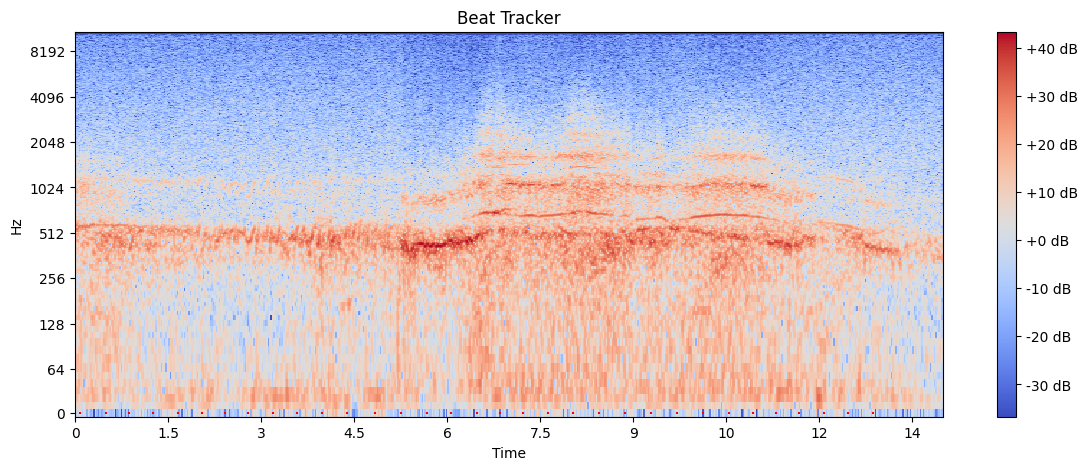

In [22]:
tempo, beats = librosa.beat.beat_track(y=x, sr=sr)

print(f"Detected Tempo: {tempo} BPM")

# Plot beat locations on the waveform
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.vlines(librosa.frames_to_time(beats, sr=sr), -1, 1, color='r')
plt.colorbar(format='%+2.0f dB')
plt.title('Beat Tracker')
plt.show()

# **Constant-Q Transform**

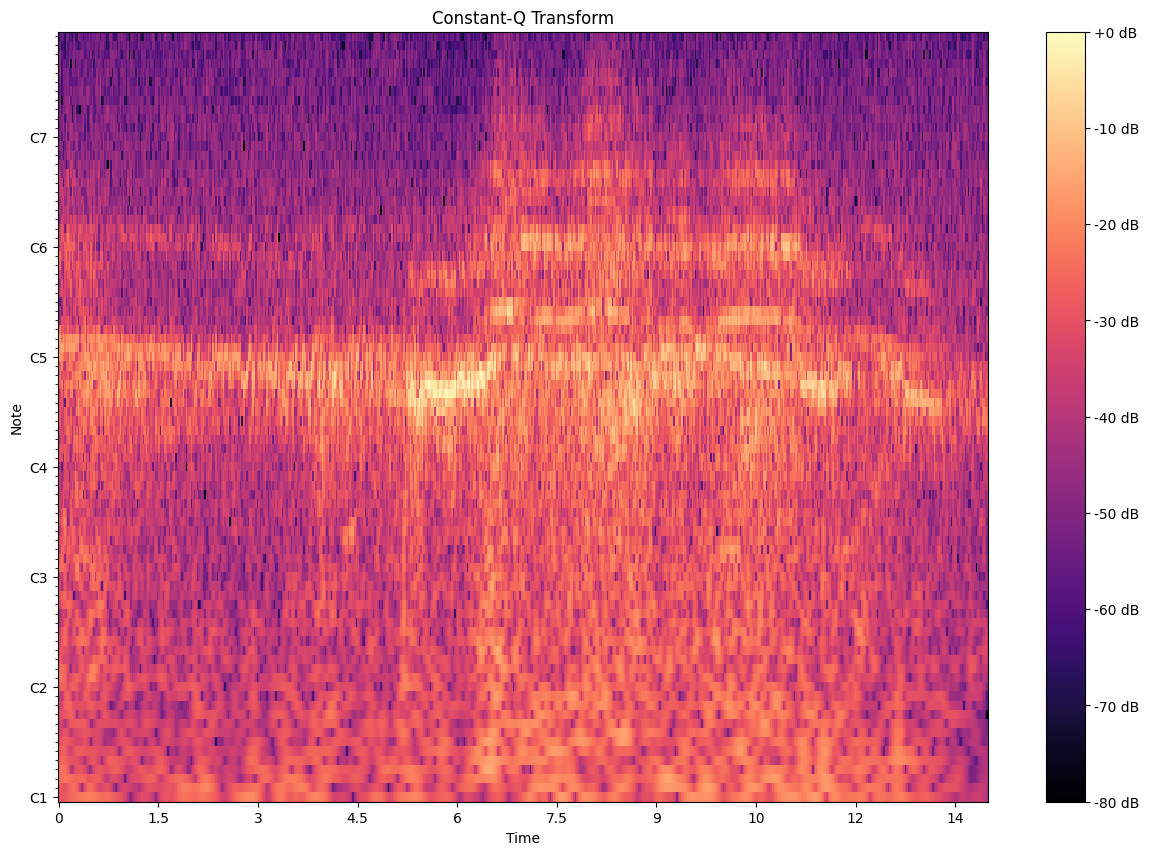

In [23]:
CQT = librosa.cqt(y=x, sr=sr)

CQT_db = librosa.amplitude_to_db(np.abs(CQT), ref=np.max)

plt.figure(figsize=(15, 10))
librosa.display.specshow(CQT_db, sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q Transform')
plt.show()

In [24]:
CQT

array([[ 0.16451885+0.07898176j,  0.07503477-0.16893075j,
        -0.17493537-0.061191j  , ..., -0.02726185-0.05966942j,
        -0.05429594+0.01662733j,  0.00777169+0.04736071j],
       [ 0.19932254+0.06645035j,  0.14120524-0.14984757j,
        -0.05946345-0.1818007j , ...,  0.01182258-0.07384428j,
        -0.06009689-0.03061838j, -0.04205242+0.04060671j],
       [ 0.27977803-0.0548012j ,  0.15150234-0.2779611j ,
        -0.13030477-0.31570265j, ...,  0.01742759-0.05628238j,
        -0.03775228-0.04627844j, -0.05648602+0.00533384j],
       ...,
       [ 0.00202976-0.00141866j,  0.01049482+0.01714942j,
         0.00927155+0.00152831j, ...,  0.02179785-0.00940012j,
        -0.00512735-0.01417242j, -0.00379711+0.00372903j],
       [-0.00274856-0.0013459j ,  0.00657242+0.00890068j,
         0.0006771 +0.00301173j, ...,  0.00797294-0.01224556j,
         0.00196731-0.00878113j, -0.01243577+0.00098962j],
       [-0.00387127+0.00539561j,  0.0060203 +0.00173507j,
        -0.00915427+0.00576309

In [25]:
CQT_db

array([[-29.40168 , -29.290546, -29.267864, ..., -38.28835 , -39.542072,
        -41.002956],
       [-28.17789 , -28.353754, -28.993402, ..., -37.150463, -38.047443,
        -39.28987 ],
       [-25.52694 , -24.617374, -23.957962, ..., -39.221638, -39.10377 ,
        -39.549347],
       ...,
       [-66.75032 , -48.560284, -55.167236, ..., -47.11771 , -51.063644,
        -60.105213],
       [-64.911156, -53.748238, -64.83624 , ..., -51.332302, -55.543022,
        -52.70585 ],
       [-58.182396, -58.68782 , -53.944347, ..., -68.3317  , -55.245922,
        -60.13832 ]], dtype=float32)